# CMPS-691 Advaced Special Topics (Fall-2019)


## Inroduction to data analysis using python 
Modified from [Kaggle Titanic](https://raw.githubusercontent.com/agconti/kaggle-titanic/master/Titanic.ipynb) and [Kaggle Titanic step by step](https://www.kaggle.com/ydalat/titanic-a-step-by-step-intro-to-machine-learning/notebook)
<br>
<br>

### Import libraries

In [1]:
# Load libraries for analysis and visualization
import pandas as pd # collection of functions for data processing and analysis modeled after R dataframes with SQL like features
from pandas import Series, DataFrame, concat
import numpy as np  # foundational package for scientific computing
import matplotlib.pyplot as plt # Collection of functions for scientific and publication-ready visualization
%matplotlib inline
import seaborn as sns  # Visualization library based on matplotlib, provides interface for drawing attractive statistical graphics

# Machine learning libraries
import sklearn         # Collection of machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

### Load Data

In [2]:
df = pd.read_csv("Titanic_Data_All.csv") 

# Show a few data points and info of each feature:

In [3]:
df[:10]

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C


In [4]:
df.describe()

,Pclass,Survived,Age,SibSp,Parch,Fare
count,1308.000000,1308.000000,1045.000000,1308.000000,1308.000000,1307.000000
mean,2.294343,0.382263,29.901120,0.496177,0.383792,33.296939
std,0.837929,0.486126,14.405892,1.037543,0.864737,51.778453
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 11 columns):
Pclass      1308 non-null int64
Survived    1308 non-null int64
Name        1308 non-null object
Sex         1308 non-null object
Age         1045 non-null float64
SibSp       1308 non-null int64
Parch       1308 non-null int64
Ticket      1308 non-null object
Fare        1307 non-null float64
Cabin       295 non-null object
Embarked    1306 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.5+ KB


# Remove features that are not useful.

In [6]:
df = df.drop(['Ticket','Cabin','Name','Embarked'], axis=1)
# drop NaN values
df = df.dropna() 

# Let's look at the data again

In [7]:
df.describe()

,Pclass,Survived,Age,SibSp,Parch,Fare
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.00000,1044.000000
mean,2.205939,0.409004,29.871810,0.500000,0.41954,36.691156
std,0.841586,0.491886,14.381591,0.906459,0.83903,55.759003
min,1.000000,0.000000,0.170000,0.000000,0.00000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.00000,8.050000
50%,2.000000,0.000000,28.000000,0.000000,0.00000,15.750000
75%,3.000000,1.000000,39.000000,1.000000,1.00000,35.500000
max,3.000000,1.000000,80.000000,8.000000,6.00000,512.329200


For more about pandas for data analysis, [10 min Tutorial](http://pandas.pydata.org/pandas-docs/stable/10min.html) 

## Visual Analysis

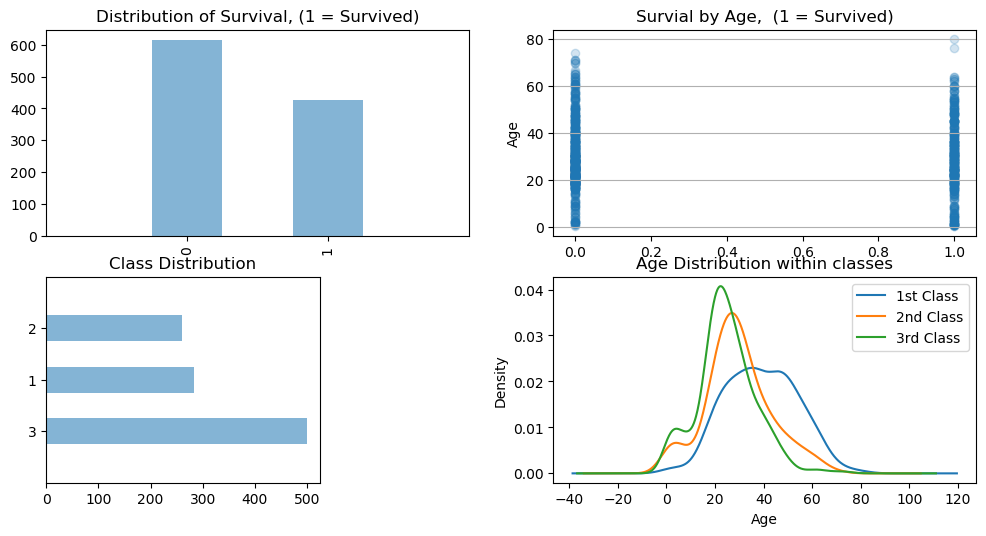

In [8]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(12,6), dpi=100) 
alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,2),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,2),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survial by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(1,0))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,2),(1,1), colspan=2)
# plots a kernel desnsity estimate of the subset of the 1st class passanges's age
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 


Text(0.5, 1.0, 'Total passenger by Parents and Children')

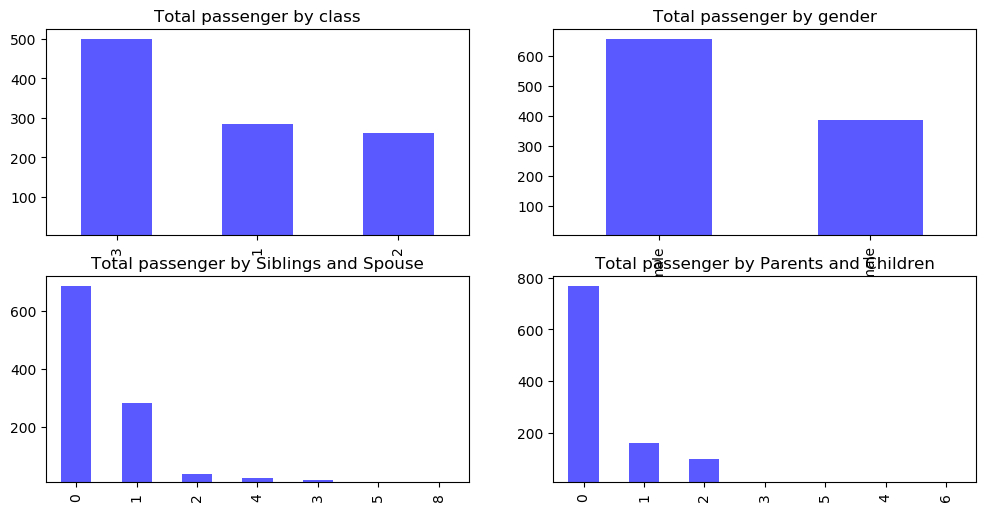

In [9]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(12,6), dpi=100) 
ax1 = plt.subplot2grid((2,2),(0,0))
df.Pclass.value_counts().plot(kind='bar', color="blue", alpha=.65)
ax1.set_ylim(len(df.Pclass.value_counts())) 
plt.title("Total passenger by class")

ax2 = plt.subplot2grid((2,2),(0,1))
df.Sex.value_counts().plot(kind='bar', color="blue", alpha=.65)
ax2.set_ylim(len(df.Sex.value_counts())) 
plt.title("Total passenger by gender")

ax3 = plt.subplot2grid((2,2),(1,0))
df.SibSp.value_counts().plot(kind='bar', color="blue", alpha=.65)
ax3.set_ylim(len(df.SibSp.value_counts())) 
plt.title("Total passenger by Siblings and Spouse")

ax4 = plt.subplot2grid((2,2),(1,1))
df.Parch.value_counts().plot(kind='bar', color="blue", alpha=.65)
ax4.set_ylim(len(df.Parch.value_counts())) 
plt.title("Total passenger by Parents and Children")

Text(0.5, 1.0, 'Survival Breakdown (1 = Survived, 0 = Died)')

<Figure size 432x288 with 0 Axes>

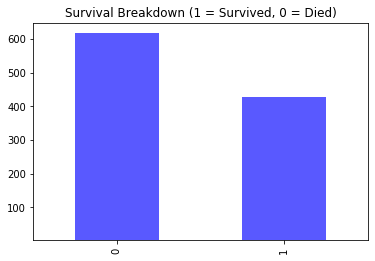

In [10]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='bar', color="blue", alpha=.65)
ax.set_ylim(len(df.Survived.value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

### Break the above graph down by gender

#### Distribution by raw number

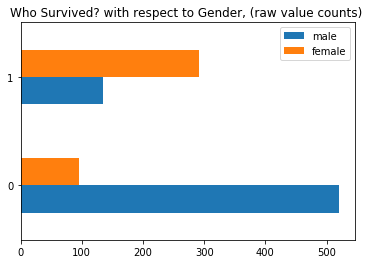

In [11]:
s1 = df.Survived[df.Sex == 'male'].value_counts()
s2 = df.Survived[df.Sex == 'female'].value_counts()
s1.name = 'male'
s2.name = 'female'
dd = concat([s1, s2], axis=1)
dd.plot(kind='barh')
#set_ylim(-1, 2) 
plt.title("Who Survived? with respect to Gender, (raw value counts) ") 
plt.legend(loc='best')

#### Distribution by ratio

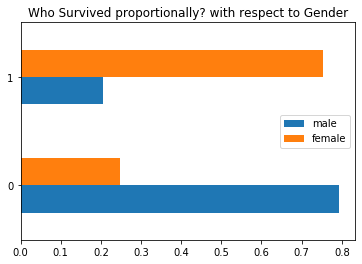

In [12]:
r1 = (df.Survived[df.Sex == 'male'].value_counts()/float(df.Sex[df.Sex == 'male'].size))
r2 = (df.Survived[df.Sex == 'female'].value_counts()/float(df.Sex[df.Sex == 'female'].size))
r1.name = 'male'
r2.name = 'female'
rr = concat([r1, r2], axis=1)
rr.plot(kind='barh')
#ax2.set_ylim(-1, 2)
plt.title("Who Survived proportionally? with respect to Gender") 
plt.legend(loc='best')

### Combining gener and class information

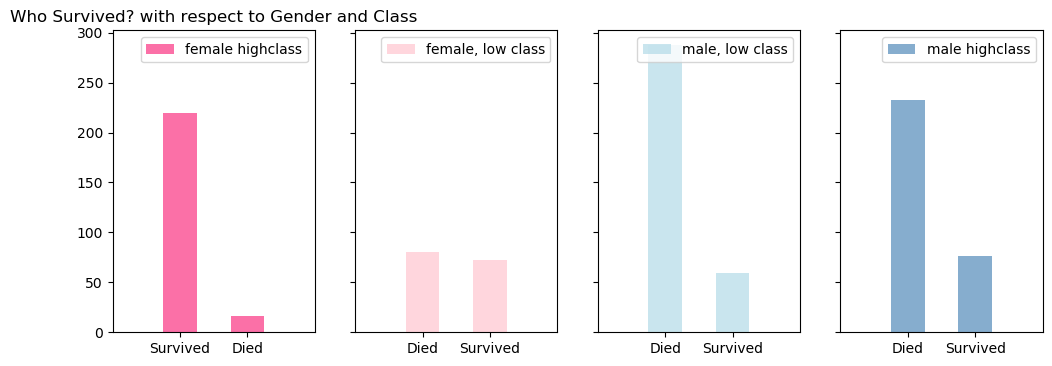

In [13]:
fig = plt.figure(figsize=(12,4), dpi=100)
alpha_level = 0.65


ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

###  seaborn: statistical data visualization
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. 
Here is the official Seaborn tutorial link https://seaborn.pydata.org/tutorial.html

Text(0.5, 1.0, 'Survival Rate by Fare and Pclass')

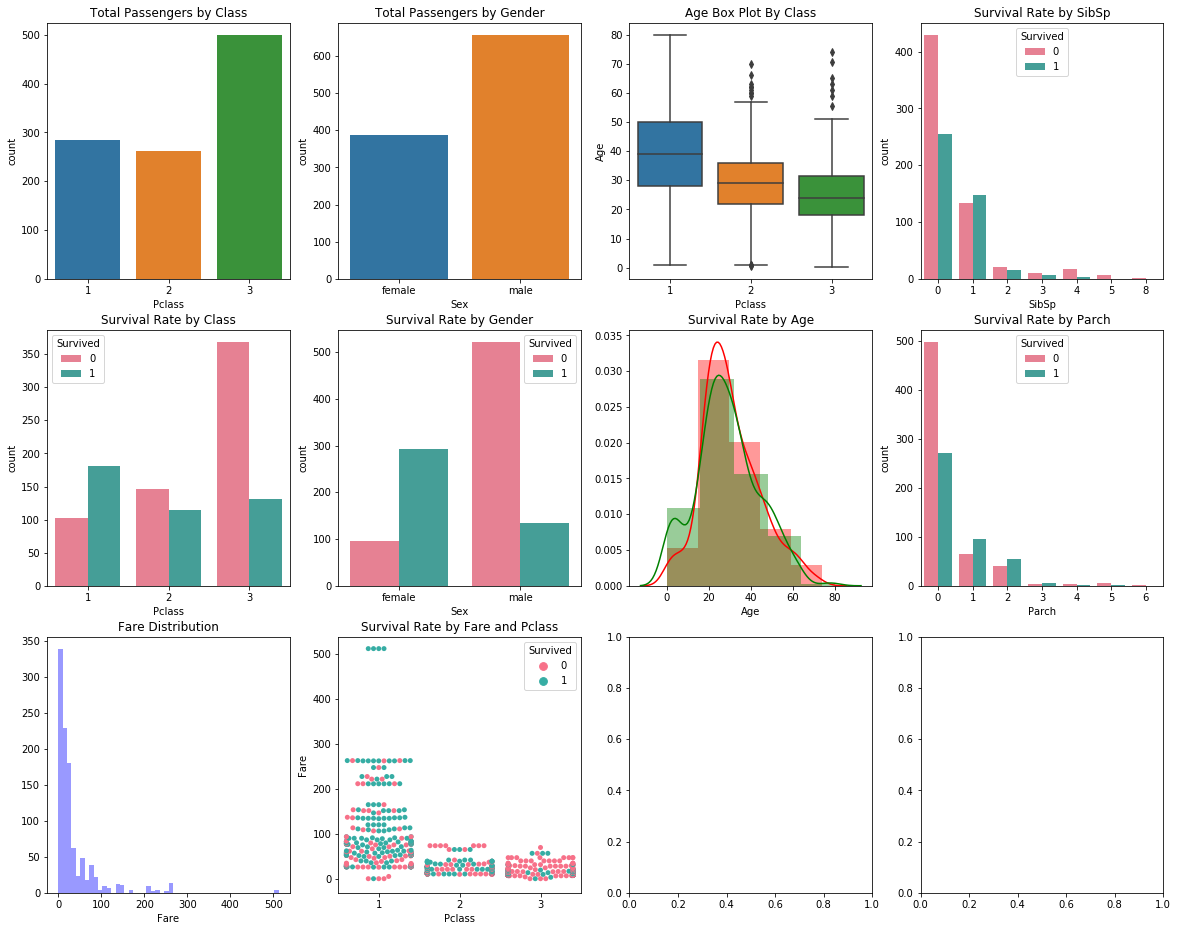

In [14]:
f,ax = plt.subplots(3,4,figsize=(20,16))
sns.countplot('Pclass',data=df,ax=ax[0,0])
sns.countplot('Sex',data=df,ax=ax[0,1])
sns.boxplot(x='Pclass',y='Age',data=df,ax=ax[0,2])
sns.countplot('SibSp',hue='Survived',data=df,ax=ax[0,3],palette='husl')
sns.distplot(df['Fare'].dropna(),ax=ax[2,0],kde=False,color='b')

sns.countplot('Pclass',hue='Survived',data=df,ax=ax[1,0],palette='husl')
sns.countplot('Sex',hue='Survived',data=df,ax=ax[1,1],palette='husl')
sns.distplot(df[df['Survived']==0]['Age'].dropna(),ax=ax[1,2],kde=True,color='r',bins=5)
sns.distplot(df[df['Survived']==1]['Age'].dropna(),ax=ax[1,2],kde=True,color='g',bins=5)
sns.countplot('Parch',hue='Survived',data=df,ax=ax[1,3],palette='husl')
sns.swarmplot(x='Pclass',y='Fare',hue='Survived',data=df,palette='husl',ax=ax[2,1])

ax[0,0].set_title('Total Passengers by Class')
ax[0,1].set_title('Total Passengers by Gender')
ax[0,2].set_title('Age Box Plot By Class')
ax[0,3].set_title('Survival Rate by SibSp')
ax[1,0].set_title('Survival Rate by Class')
ax[1,1].set_title('Survival Rate by Gender')
ax[1,2].set_title('Survival Rate by Age')
ax[1,3].set_title('Survival Rate by Parch')
ax[2,0].set_title('Fare Distribution')
ax[2,1].set_title('Survival Rate by Fare and Pclass')

## k-Nearest Neighbors algorithm (k-NN)
This is a non-parametric method used for classification and regression.
A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [15]:
# Mapping Gender
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int) 

In [16]:
X_train = df.drop("Survived", axis=1)
Y_train = df["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=101, shuffle = True)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((730, 6), (314, 6), (730,), (314,))

### Here is the help for 
[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) and different [DistanceMetrics](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)

In [17]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=10, p=2, 
                           weights='uniform')
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)

print('Accuracy of k-NN is ',acc_knn, '%')

Accuracy of k-NN is  71.66 %


### Plot the ROC curve and find the area under the ROC

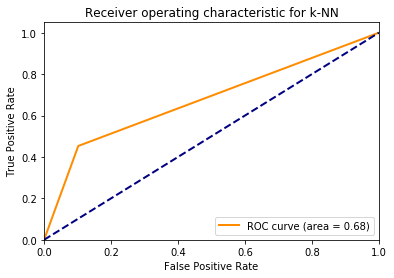

In [18]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for k-NN')
plt.legend(loc="lower right")
plt.show()

### Scaling the features (Normalizing the data) and then classifying using k-NN

In [19]:
from sklearn import preprocessing

scaler_train = preprocessing.StandardScaler().fit(X_train)
X_train_n = scaler_train.transform(X_train)

scaler_test = preprocessing.StandardScaler().fit(X_test)
X_test_n = scaler_test.transform(X_test)

knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=7, p=2, 
                           weights='uniform')
knn.fit(X_train_n, Y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test_n, Y_test) * 100, 2)

print('Accuracy of k-NN is ',acc_knn, '%')

Accuracy of k-NN is  82.48 %


In [20]:
#Scaling features to a range
min_max_scaler_train = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler_train.fit_transform(X_train)

min_max_scaler_test = preprocessing.MinMaxScaler()
X_test_minmax = min_max_scaler_test.fit_transform(X_test)

knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=7, p=1, 
                           weights='uniform')
knn.fit(X_train_minmax, Y_train)
y_pred = knn.predict(X_test_minmax)
acc_knn = round(knn.score(X_test_n, Y_test) * 100, 2)

print('Accuracy of k-NN is ',acc_knn, '%')

Accuracy of k-NN is  81.21 %
